In [5]:
import pandas as pd
import numpy as np
import cpi
from tqdm import tqdm, tqdm_notebook
from statsmodels.tsa.stattools import adfuller

In [10]:
import matplotlib.pyplot as plt

In [6]:
file_path_1 = uniqueers/jenniferpaige/Desktop/TTS_10-Dec-2019_p1.csv'
file_path_2 = '/Users/jenniferpaige/Desktop/TTS_10-Dec-2019_p2.csv'
files = [file_path_1, file_path_2]
loaded_files = []
count = 0
for i in tqdm(range(1, len(files)+1)):
    exec(f"df{i} = pd.read_csv(files[{count}],encoding='iso-8859-1', parse_dates=['Installation Date'], usecols=['Installation Date','System Size','Total Installed Price','Customer Segment', 'State'],na_values=(-9999, '-9999'))")
    count+=1
[exec("loaded_files.append(df{})".format(i)) for i in range(1, len(files)+1)]
if len(loaded_files) > 1:
    df = pd.concat([i for i in loaded_files],ignore_index=True)
else: 
    df=loaded_files[0]
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.sort_values('installation_date', inplace=True)
df.set_index('installation_date', drop=True, inplace=True)
[df['total_installed_price'].replace(np.nan,round(df.loc[(df['total_installed_price'] != np.nan) & (df.index.year == i)]['total_installed_price'].median(),2),inplace=True) for i in tqdm(range(1998,2019))] 
df['date'] = df.index.date
df['adj_installed_price'] = round(df.apply(lambda x:cpi.inflate(x.total_installed_price, x.date), axis=1),2)
df['cost_per_watt'] = round(df['adj_installed_price']/ df['system_size']/1000,2)
null_list = []
for i in tqdm(range(len(df.cost_per_watt.resample('W').median()))):
    if df.cost_per_watt.resample('W').median()[i] >0:
        pass
    else:
        null_list.append(i)
y = df.cost_per_watt.resample('W').median()[null_list[-1]+1:]
if round(adfuller(y)[1],4) < 0.51:
else:
weekly_differences = y.diff(periods=1).dropna()

100%|██████████| 1093/1093 [00:56<00:00, 19.31it/s]


|       ADF P-value: 0.9509 
|       Time Series is not stationary.   
|       Fail to reject ADF H0
|       ADF P-value: 0.0 
|       Differenced data achieved stationarity. 
|       Reject ADF H0


In [9]:
df['year'] = df.index.year

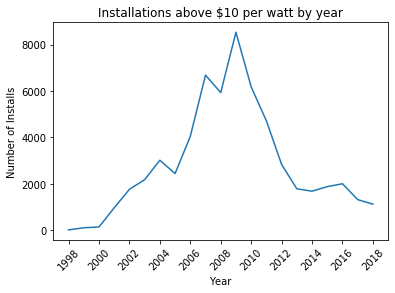

In [11]:
plt.plot(df.loc[df.cost_per_watt >10].groupby('year').count().system_size)
plt.title('Installations above $10 per watt by year')
plt.xlabel('Year')
plt.ylabel('Number of Installs')
plt.xticks(ticks= list(df.year.unique())[::2], rotation=45)
plt.show()

In [174]:
df

,system_size,total_installed_price,customer_segment,state,date,adj_installed_price,cost_per_watt,year,sys_size_group
installation_date,,,,,,,,,
1998-01-30,4.2515,17640.08,RES,CA,1998-01-30,28175.55,6.63,1998,"(2.5, 5.0]"
1998-03-01,0.6500,17640.08,RES,NM,1998-03-01,28071.33,43.19,1998,"(0.0, 2.5]"
1998-04-01,110.3000,17640.08,NON-RES,AZ,1998-04-01,28019.50,0.25,1998,"(42.5, 18000.0]"
1998-04-08,2.3316,30941.00,RES,CA,1998-04-08,49146.68,21.08,1998,"(0.0, 2.5]"
1998-04-30,4.1811,17640.08,RES,CA,1998-04-30,28019.50,6.70,1998,"(2.5, 5.0]"
...,...,...,...,...,...,...,...,...,...
2018-12-31,5.7035,22030.50,RES,CA,2018-12-31,22633.98,3.97,2018,"(5.0, 7.5]"
2018-12-31,3.3000,24750.00,RES,CA,2018-12-31,25427.97,7.71,2018,"(2.5, 5.0]"
2018-12-31,4.2000,29400.00,RES,CA,2018-12-31,30205.35,7.19,2018,"(2.5, 5.0]"


In [182]:
df.cost_per_watt.groupby(df['year']).mean()

year
1998    25.538846
1999    11.555160
2000    14.432810
2001    12.577473
2002    11.632536
2003    11.163529
2004    10.325487
2005    10.134592
2006     9.789249
2007     9.979351
2008     9.784714
2009     9.849535
2010     8.471296
2011     6.956878
2012     5.944160
2013     5.122213
2014     4.361602
2015     4.368790
2016     6.842455
2017     4.167934
2018     3.950167
Name: cost_per_watt, dtype: float64

In [ ]:
df.cost_per_watt.groupby(df['year']).mean()

In [178]:
df.loc[(df['cost_per_watt'] > 25.538846) & (df['year'] == 1998)]

,system_size,total_installed_price,customer_segment,state,date,adj_installed_price,cost_per_watt,year,sys_size_group
installation_date,,,,,,,,,
1998-03-01,0.650,17640.08,RES,NM,1998-03-01,28071.33,43.19,1998,"(0.0, 2.5]"
1998-05-12,0.600,17439.00,RES,OR,1998-05-12,27649.06,46.08,1998,"(0.0, 2.5]"
1998-10-01,0.100,17640.08,RES,NM,1998-10-01,27763.23,277.63,1998,"(0.0, 2.5]"
1998-12-24,0.462,11423.00,RES,CA,1998-12-24,17989.31,38.94,1998,"(0.0, 2.5]"


In [ ]:
df.loc[(df['cost_per_watt'] > 25.538846) & (df['year'] == 1998)]

In [169]:
df.cost_per_watt.mean(axis=0)

5.41348102221054

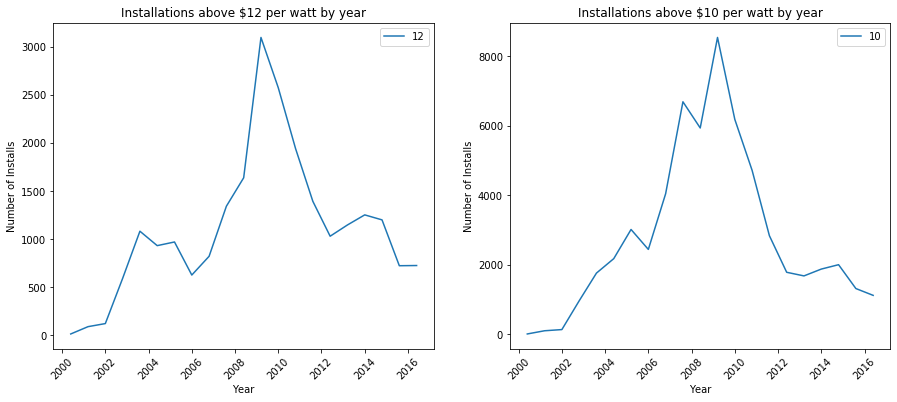

In [165]:
fix, ax = plt.subplots(1,2, figsize=(15,6))
ax[0].plot(df.loc[df.cost_per_watt >12].groupby('year').count().system_size, label='12')
ax[0].plot()
ax[0].set_title('Installations above $12 per watt by year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Installs')
ax[0].legend(loc='best')
ax[0].set_xticklabels(labels= list(df.year.unique())[::2], rotation=45)

ax[1].plot(df.loc[df.cost_per_watt >10].groupby('year').count().system_size, label='10')
ax[1].set_title('Installations above $10 per watt by year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of Installs')
ax[1].legend(loc='best')
ax[1].set_xticklabels(labels= list(df.year.unique())[::2], rotation=45)
plt.show()


# plt.plot(df.loc[df.cost_per_watt >12].groupby('year').count().system_size, label='12')
# plt.title('Installations above $12 per watt by year')
# plt.xlabel('Year')
# plt.ylabel('Number of Installs')
# plt.legend(loc='best')
# plt.xticks(ticks= list(df.year.unique())[::2], rotation=45)
# plt.show()

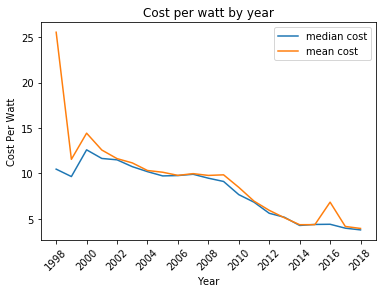

In [142]:
plt.plot(df.groupby('year').median().cost_per_watt, label='median cost')
plt.plot(df.groupby('year').mean().cost_per_watt, label='mean cost')
plt.xticks(ticks= list(df.year.unique())[::2], rotation=45)
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Cost Per Watt')
plt.title('Cost per watt by year')
plt.show()

In [41]:
sys_bins = [0.0, 2.5, 5.0, 7.5, 10, 12.5, 17.5, 42.5, 18000]
df['sys_size_group'] = pd.cut(df['system_size'], sys_bins)
pivot_tb = pd.pivot_table(df, values='cost_per_watt', index='year', columns='sys_size_group')

In [57]:
size_df = df.copy()

In [66]:
size_dummies = pd.get_dummies(size_df['sys_size_group'])

In [74]:
sns.jointplot(x='')

,system_size,total_installed_price,customer_segment,state,date,adj_installed_price,cost_per_watt,year,sys_size_group,"(0.0, 2.5]","(2.5, 5.0]","(5.0, 7.5]","(7.5, 10.0]","(10.0, 12.5]","(12.5, 17.5]","(17.5, 42.5]","(42.5, 18000.0]"
installation_date,,,,,,,,,,,,,,,,,
1998-01-30,4.2515,17640.08,RES,CA,1998-01-30,28175.55,6.63,1998,"(2.5, 5.0]",0,1,0,0,0,0,0,0
1998-03-01,0.6500,17640.08,RES,NM,1998-03-01,28071.33,43.19,1998,"(0.0, 2.5]",1,0,0,0,0,0,0,0
1998-04-01,110.3000,17640.08,NON-RES,AZ,1998-04-01,28019.50,0.25,1998,"(42.5, 18000.0]",0,0,0,0,0,0,0,1
1998-04-08,2.3316,30941.00,RES,CA,1998-04-08,49146.68,21.08,1998,"(0.0, 2.5]",1,0,0,0,0,0,0,0
1998-04-30,4.1811,17640.08,RES,CA,1998-04-30,28019.50,6.70,1998,"(2.5, 5.0]",0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,5.7035,22030.50,RES,CA,2018-12-31,22633.98,3.97,2018,"(5.0, 7.5]",0,0,1,0,0,0,0,0
2018-12-31,3.3000,24750.00,RES,CA,2018-12-31,25427.97,7.71,2018,"(2.5, 5.0]",0,1,0,0,0,0,0,0
2018-12-31,4.2000,29400.00,RES,CA,2018-12-31,30205.35,7.19,2018,"(2.5, 5.0]",0,1,0,0,0,0,0,0


In [133]:
size_df.loc[size_df['cost_per_watt'] <20]

,system_size,total_installed_price,customer_segment,state,date,adj_installed_price,cost_per_watt,year,sys_size_group,"(0.0, 2.5]","(2.5, 5.0]","(5.0, 7.5]","(7.5, 10.0]","(10.0, 12.5]","(12.5, 17.5]","(17.5, 42.5]","(42.5, 18000.0]",size_group
installation_date,,,,,,,,,,,,,,,,,,
1998-01-30,4.251500,17640.08,RES,CA,1998-01-30,28175.55,6.63,1998,"(2.5, 5.0]",0,1,0,0,0,0,0,0,"(2.5, 5.0]"
1998-04-01,110.300000,17640.08,NON-RES,AZ,1998-04-01,28019.50,0.25,1998,"(42.5, 18000.0]",0,0,0,0,0,0,0,1,"(42.5, 18000.0]"
1998-04-30,4.181100,17640.08,RES,CA,1998-04-30,28019.50,6.70,1998,"(2.5, 5.0]",0,1,0,0,0,0,0,0,"(2.5, 5.0]"
1998-07-07,2.282400,24500.00,RES,CA,1998-07-07,38748.88,16.98,1998,"(0.0, 2.5]",1,0,0,0,0,0,0,0,"(0.0, 2.5]"
1998-07-10,3.113265,17640.08,RES,CA,1998-07-10,27899.32,8.96,1998,"(2.5, 5.0]",0,1,0,0,0,0,0,0,"(2.5, 5.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,5.703500,22030.50,RES,CA,2018-12-31,22633.98,3.97,2018,"(5.0, 7.5]",0,0,1,0,0,0,0,0,"(5.0, 7.5]"
2018-12-31,3.300000,24750.00,RES,CA,2018-12-31,25427.97,7.71,2018,"(2.5, 5.0]",0,1,0,0,0,0,0,0,"(2.5, 5.0]"
2018-12-31,4.200000,29400.00,RES,CA,2018-12-31,30205.35,7.19,2018,"(2.5, 5.0]",0,1,0,0,0,0,0,0,"(2.5, 5.0]"


In [73]:
size_df = pd.concat([size_df, size_dummies], axis=1)

In [42]:
pivot_tb

sys_size_group,"(0.0, 2.5]","(2.5, 5.0]","(5.0, 7.5]","(7.5, 10.0]","(10.0, 12.5]","(12.5, 17.5]","(17.5, 42.5]","(42.5, 18000.0]"
year,,,,,,,,
1998,40.672857,7.613333,5.110000,NaN,NaN,20.710000,NaN,0.250000
1999,15.584421,9.398133,9.535625,5.727143,7.428889,5.200000,7.290000,0.276667
2000,17.636126,11.069848,13.615333,7.275385,10.005000,NaN,NaN,3.840000
2001,14.918981,11.334150,10.573846,8.325429,9.645217,9.780000,7.338571,3.247500
2002,14.807557,11.333492,9.542649,8.062500,9.230818,7.893333,8.159000,2.846250
2003,13.414016,10.866144,9.950793,9.338964,16.123333,7.829211,8.148955,4.820000
2004,13.037209,10.093871,9.459725,9.022483,8.478035,8.179667,7.904122,6.906100
2005,14.487545,9.554695,8.874252,9.334893,8.601245,7.978939,7.754309,5.935468
2006,12.626069,9.760397,9.073150,9.069921,7.969413,8.542579,7.713866,6.704598


In [85]:
size_df['size_group'] = 0

In [102]:
size_df.drop(columns='size_group', inplace=True)

In [99]:
sizes_nums = []
for i in tqdm(range(len(size_df))):
    sizes_nums.append( str(size_df.sys_size_group[i]))

100%|██████████| 1543831/1543831 [01:50<00:00, 14012.97it/s]


In [104]:
size_df['size_group'] = sizes_nums

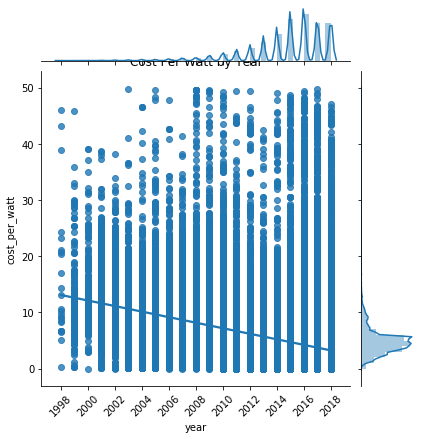

In [141]:
sns.jointplot(y='cost_per_watt' , x='year' , kind='reg', data=size_df.loc[size_df['cost_per_watt'] < 50])
plt.title('Cost Per Watt by Year', loc='center')
plt.xticks(ticks= list(size_df.year.unique())[::2], rotation=45)
plt.show()

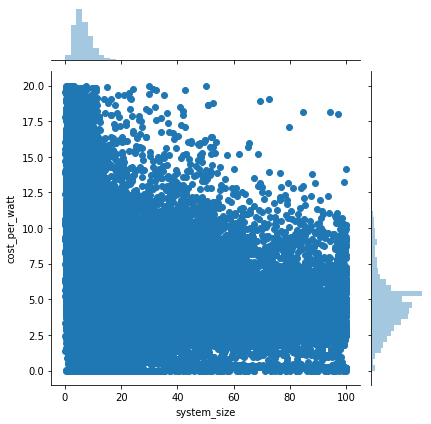

In [129]:
sns.jointplot(x='system_size' , y='cost_per_watt', kind='reg', data=size_df.loc[(size_df['cost_per_watt'] < 20) & (size_df['system_size']<100)])

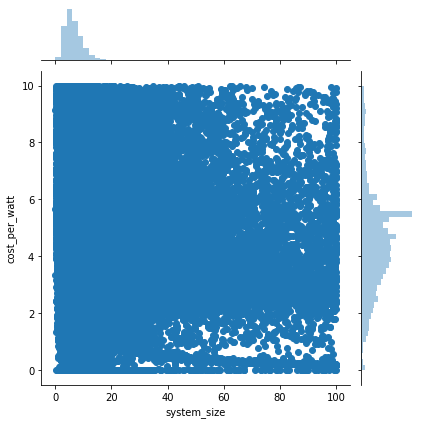

In [132]:
sns.jointplot(x='system_size' , y='cost_per_watt' ,  data=size_df.loc[(size_df['cost_per_watt'] < 10) & (size_df['system_size']<100)])

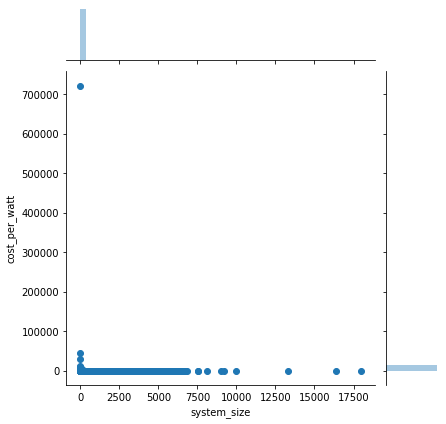

In [130]:
sns.jointplot(x='system_size' , y='cost_per_watt' ,  data=size_df)